<a href="https://colab.research.google.com/github/christina-ohjoo/Machine-Learning/blob/main/MF%2BDO_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.utils import normalize, to_categorical
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import scipy.special
import time
import datetime

import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [ ]:
print(keras.__version__)

2.4.3


In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print('축의 개수 : ', x_train.ndim)
print('배열의 크기 : ', x_train.shape)

축의 개수 :  3
배열의 크기 :  (60000, 28, 28)


In [ ]:
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#without dropout
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_5 (Activation)    (None, 10)               

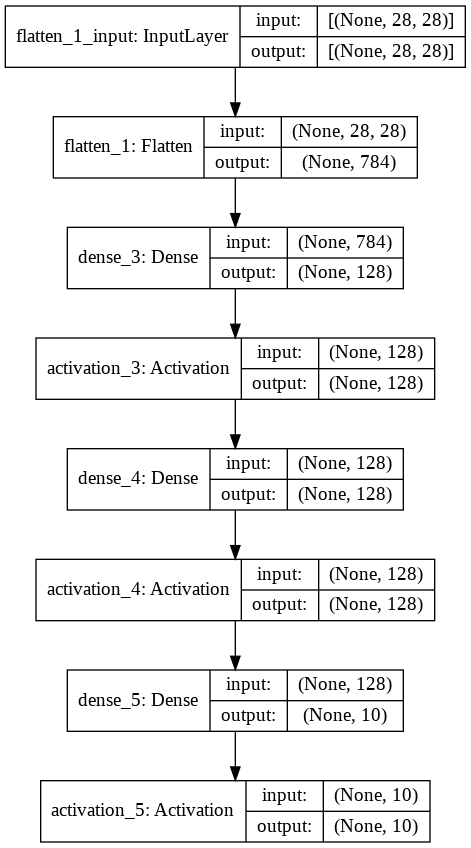

In [ ]:
plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
#50번 반복
start_1 = time.time()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

sec_1 = time.time() - start_1
times_1 = str(datetime.timedelta(seconds=sec_1)).split(".")
times_1 = times_1[0]
print(times_1)

Epoch 1/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5040 - accuracy: 0.8466 - val_loss: 0.1111 - val_accuracy: 0.9677
Epoch 2/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1133 - accuracy: 0.9655 - val_loss: 0.0975 - val_accuracy: 0.9735
Epoch 3/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9762 - val_loss: 0.0898 - val_accuracy: 0.9733
Epoch 4/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.0899 - val_accuracy: 0.9733
Epoch 5/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.0871 - val_accuracy: 0.9742
Epoch 6/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0289 - accuracy: 0.9902 - val_loss: 0.0856 - val_accuracy: 0.9768
Epoch 7/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0247 - accuracy: 0.9919 - val_loss: 0.0869 - val_accuracy:

In [ ]:
#with dropout 50%
model_dropout_50 = Sequential()
model_dropout_50.add(Flatten(input_shape=(28, 28)))
model_dropout_50.add(Dense(128))
model_dropout_50.add(Dropout(0.5))
model_dropout_50.add(Activation('relu'))
model_dropout_50.add(Dense(128))
model_dropout_50.add(Dropout(0.5))
model_dropout_50.add(Activation('relu'))
model_dropout_50.add(Dense(10))
model_dropout_50.add(Activation('softmax'))
model_dropout_50.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_7 (Activation)    (None, 128)              

In [ ]:
model_dropout_50.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
#50번 반복//dropout 50%

start_2 = time.time()

history_50 = model_dropout_50.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)
sec_2 = time.time() - start_2
times_2 = str(datetime.timedelta(seconds=sec_2)).split(".")
times_2 = times_2[0]
print(times_2)

Epoch 1/50
1688/1688 [==============================] - 5s 2ms/step - loss: 0.8557 - accuracy: 0.7298 - val_loss: 0.1655 - val_accuracy: 0.9498
Epoch 2/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3100 - accuracy: 0.9102 - val_loss: 0.1368 - val_accuracy: 0.9600
Epoch 3/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2394 - accuracy: 0.9305 - val_loss: 0.1081 - val_accuracy: 0.9688
Epoch 4/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2098 - accuracy: 0.9391 - val_loss: 0.0976 - val_accuracy: 0.9725
Epoch 5/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1972 - accuracy: 0.9414 - val_loss: 0.0885 - val_accuracy: 0.9753
Epoch 6/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1804 - accuracy: 0.9477 - val_loss: 0.0889 - val_accuracy: 0.9740
Epoch 7/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1722 - accuracy: 0.9496 - val_loss: 0.0901 - val_accuracy:

In [ ]:
start_3 = time.time()

history_50_half = model_dropout_50.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

sec_3 = time.time() - start_3
times_3 = str(datetime.timedelta(seconds=sec_3)).split(".")
times_3 = times_3[0]
print(times_3)

Epoch 1/25
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9727 - val_loss: 0.0838 - val_accuracy: 0.9793
Epoch 2/25
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9736 - val_loss: 0.0893 - val_accuracy: 0.9788
Epoch 3/25
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9741 - val_loss: 0.0909 - val_accuracy: 0.9785
Epoch 4/25
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0865 - accuracy: 0.9732 - val_loss: 0.0899 - val_accuracy: 0.9800
Epoch 5/25
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9733 - val_loss: 0.0896 - val_accuracy: 0.9810
Epoch 6/25
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0856 - accuracy: 0.9741 - val_loss: 0.0951 - val_accuracy: 0.9807
Epoch 7/25
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0863 - accuracy: 0.9736 - val_loss: 0.0916 - val_accuracy:

In [ ]:
#with dropout 75%
model_dropout_75 = Sequential()
model_dropout_75.add(Flatten(input_shape=(28, 28)))
model_dropout_75.add(Dense(128))
model_dropout_75.add(Dropout(0.75))
model_dropout_75.add(Activation('relu'))
model_dropout_75.add(Dense(128))
model_dropout_75.add(Dropout(0.75))
model_dropout_75.add(Activation('relu'))
model_dropout_75.add(Dense(10))
model_dropout_75.add(Activation('softmax'))
model_dropout_75.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_10 (Activation)   (None, 128)              

In [ ]:
model_dropout_75.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
start_4 = time.time()

history_75 = model_dropout_75.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

sec_4 = time.time() - start_4
times_4 = str(datetime.timedelta(seconds=sec_4)).split(".")
times_4 = times_4[0]
print(times_4)

Epoch 1/50
1688/1688 [==============================] - 5s 3ms/step - loss: 1.4178 - accuracy: 0.5074 - val_loss: 0.2750 - val_accuracy: 0.9283
Epoch 2/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.6310 - accuracy: 0.8146 - val_loss: 0.2166 - val_accuracy: 0.9457
Epoch 3/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5342 - accuracy: 0.8486 - val_loss: 0.1882 - val_accuracy: 0.9502
Epoch 4/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5184 - accuracy: 0.8559 - val_loss: 0.1853 - val_accuracy: 0.9507
Epoch 5/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4873 - accuracy: 0.8637 - val_loss: 0.1724 - val_accuracy: 0.9537
Epoch 6/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4722 - accuracy: 0.8675 - val_loss: 0.1630 - val_accuracy: 0.9563
Epoch 7/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4507 - accuracy: 0.8729 - val_loss: 0.1570 - val_accuracy:

In [ ]:
start_5 = time.time()

history_75 = model_dropout_75.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

sec_5 = time.time() - start_5
times_5 = str(datetime.timedelta(seconds=sec_5)).split(".")
times_5 = times_5[0]
print(times_5)

Epoch 1/25
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3449 - accuracy: 0.9013 - val_loss: 0.1458 - val_accuracy: 0.9667
Epoch 2/25
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3428 - accuracy: 0.9016 - val_loss: 0.1416 - val_accuracy: 0.9663
Epoch 3/25
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3426 - accuracy: 0.9000 - val_loss: 0.1514 - val_accuracy: 0.9668
Epoch 4/25
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3398 - accuracy: 0.9011 - val_loss: 0.1421 - val_accuracy: 0.9710
Epoch 5/25
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3424 - accuracy: 0.8998 - val_loss: 0.1479 - val_accuracy: 0.9688
Epoch 6/25
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3433 - accuracy: 0.9003 - val_loss: 0.1415 - val_accuracy: 0.9672
Epoch 7/25
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.9020 - val_loss: 0.1448 - val_accuracy:

In [ ]:
weight_array_50 = model_dropout_50.get_weights()
weight_array_50


[array([[-0.06526154, -0.03391934,  0.00629923, ...,  0.04787786,
         -0.02168988,  0.06990128],
        [-0.05644856,  0.0498646 ,  0.0098365 , ...,  0.07672832,
          0.07871274, -0.01903446],
        [ 0.00280005,  0.03488851, -0.06356074, ..., -0.02683819,
         -0.02091702, -0.03646635],
        ...,
        [-0.02395352,  0.07279383, -0.01720546, ..., -0.06917419,
         -0.00539654,  0.0719874 ],
        [ 0.01464762,  0.07335281,  0.00271396, ...,  0.01807696,
          0.0762684 , -0.06908229],
        [ 0.05730804, -0.07146813, -0.00092696, ...,  0.01155809,
         -0.00890138, -0.02690056]], dtype=float32),
 array([-0.19160196, -0.48444143, -0.05657321, -0.47530577,  0.14700063,
         0.0277285 , -0.3785028 , -0.10574704,  0.0368518 , -0.2195262 ,
        -0.01469063, -0.13358323, -0.8352137 , -0.3553853 , -0.53196335,
        -0.24124819, -0.0077738 , -0.09785039, -0.02227728, -0.27971262,
        -0.5984076 , -0.19048947, -0.27796838, -0.3115249 , -0.173

In [ ]:
n = len(weight_array_50)
n

6

In [ ]:
class MatrixFactorization():
    def __init__(self, R, k, learning_rate, reg_param, epochs, verbose=False):
        """
        :param R: rating matrix
        :param k: latent parameter
        :param learning_rate: alpha on weight update
        :param reg_param: beta on weight update
        :param epochs: training epochs
        :param verbose: print status
        """

        self._R = R
        self.x, self.y = R.shape
        self._k = k
        self._learning_rate = learning_rate
        self._reg_param = reg_param
        self._epochs = epochs
        self._verbose = verbose


    def fit(self):
        """
        training Matrix Factorization : Update matrix latent weight and bias

        참고: self._b에 대한 설명
        - global bias: input R에서 평가가 매겨진 rating의 평균값을 global bias로 사용
        - 정규화 기능. 최종 rating에 음수가 들어가는 것 대신 latent feature에 음수가 포함되도록 해줌.

        :return: training_process
        """
        # init latent features
        self._P = np.random.normal(size=(self.x, self._k))
        self._Q = np.random.normal(size=(self.y, self._k))

        # init biases
        self._b_P = np.zeros(self.x)
        self._b_Q = np.zeros(self.y)
        self._b = np.mean(self._R[np.where(self._R != 0)])
        

        # train while epochs
        self._training_process = []
        for epoch in range(self._epochs):

            # rating이 존재하는 index를 기준으로 training
            for i in range(self.x):
                for j in range(self.y):
                    if self._R[i, j] > 0:
                        self.gradient_descent(i, j, self._R[i, j])
            cost = self.cost()
            self._training_process.append((epoch, cost))

            # print status
            if self._verbose == True and ((epoch + 1) % 10 == 0):
                print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


    def cost(self):
        """
        compute root mean square error
        :return: rmse cost
        """

        # xi, yi: R[xi, yi]는 nonzero인 value를 의미한다.
        # 참고: http://codepractice.tistory.com/90
        Xi, Yi = self._R.nonzero()
        predicted = self.get_complete_matrix()
        cost = 0
        for X, Y in zip(Xi, Yi):
            cost += pow(self._R[X, Y] - predicted[X, Y], 2)
        return np.sqrt(cost) / len(Xi)


    def gradient(self, error, i, j):
        """
        gradient of latent feature for GD

        :param error: rating - prediction error
        :param i: user index
        :param j: item index
        :return: gradient of latent feature tuple
        """

        dp = (error * self._Q[j, :]) - (self._reg_param * self._P[i, :])
        dq = (error * self._P[i, :]) - (self._reg_param * self._Q[j, :])
        return dp, dq


    def gradient_descent(self, i, j, rating):
        """
        graident descent function

        :param i: user index of matrix
        :param j: item index of matrix
        :param rating: rating of (i,j)
        """

        # get error
        prediction = self.get_prediction(i, j)
        error = rating - prediction

        # update biases
        self._b_P[i] += self._learning_rate * (error - self._reg_param * self._b_P[i])
        self._b_Q[j] += self._learning_rate * (error - self._reg_param * self._b_Q[j])

        # update latent feature
        dp, dq = self.gradient(error, i, j)
        self._P[i, :] += self._learning_rate * dp
        self._Q[j, :] += self._learning_rate * dq


    def get_prediction(self, i, j):
        """
        get predicted rating: user_i, item_j
        :return: prediction of r_ij
        """
        return self._b + self._b_P[i] + self._b_Q[j] + self._P[i, :].dot(self._Q[j, :].T)


    def get_complete_matrix(self):
        """
        computer complete matrix PXQ + P.bias + Q.bias + global bias

        - PXQ 행렬에 b_P[:, np.newaxis]를 더하는 것은 각 열마다 bias를 더해주는 것
        - b_Q[np.newaxis:, ]를 더하는 것은 각 행마다 bias를 더해주는 것
        - b를 더하는 것은 각 element마다 bias를 더해주는 것

        - newaxis: 차원을 추가해줌. 1차원인 Latent들로 2차원의 R에 행/열 단위 연산을 해주기위해 차원을 추가하는 것.

        :return: complete matrix R^
        """
        return self._b + self._b_P[:, np.newaxis] + self._b_Q[np.newaxis:, ] + self._P.dot(self._Q.T)


    def print_results(self):
        """
        print fit results
        """

        print("User Latent P:")
        print(self._P)
        print("Item Latent Q:")
        print(self._Q.T)
        print("P x Q:")
        print(self._P.dot(self._Q.T))
        print("bias:")
        print(self._b)
        print("User Latent bias:")
        print(self._b_P)
        print("Item Latent bias:")
        print(self._b_Q)
        print("Final R matrix:")
        global matrix_2 
        matrix_2 = self.get_complete_matrix()
        print(matrix_2)
        print("Final RMSE:")
        print(self._training_process[self._epochs-1][1])
        

        #df = pd.DataFrame(matrix_2)
        #df.to_csv('sample.csv', index=False)

    #def to_dataframe(self):
        #matrix를 csv파일로 내보내기위해 dataframe으로 변환
        #array df
        #df=pd.DataFrame(self.get_complete_matrix(), columns = df_user_movie_ratings.columns)

In [ ]:
# run example
if __name__ == "__main__":
    # rating matrix - User X Item : (7 X 5)
    

    R1 = weight_array_50[0]

    start_6 = time.time()

    # P, Q is (7 X k), (k X 5) matrix
    factorizer1_50 = MatrixFactorization(R1, k=50, learning_rate=0.01, reg_param=0.01, epochs=100, verbose=True)
    factorizer1_50.fit()
    factorizer1_50.print_results()

    sec_6 = time.time() - start_6
    times_6 = str(datetime.timedelta(seconds=sec_6)).split(".")
    times_6 = times_6[0]
    print(times_6)


  


Iteration: 10 ; cost = 0.0014
Iteration: 20 ; cost = 0.0013
Iteration: 30 ; cost = 0.0013
Iteration: 40 ; cost = 0.0013
Iteration: 50 ; cost = 0.0013
Iteration: 60 ; cost = 0.0013
Iteration: 70 ; cost = 0.0013
Iteration: 80 ; cost = 0.0013
Iteration: 90 ; cost = 0.0013
Iteration: 100 ; cost = 0.0013
User Latent P:
[[-0.17021886  0.18634057 -0.48128278 ...  0.35215488 -0.23531371
   0.30113367]
 [ 0.44495634  0.39461224  0.29916141 ...  0.4087484  -0.36496483
   0.70032861]
 [ 0.20817768 -0.1638659   0.02969753 ...  0.64344001 -0.84903232
   0.18220043]
 ...
 [-0.61144425  0.55253623  0.06757476 ...  0.39710631  0.79040476
   0.10947617]
 [-0.22086989 -0.46896247 -0.45277568 ...  0.21542169  0.05699159
   1.52417167]
 [-1.09240458  0.62944177 -0.21195631 ... -0.31069664 -0.49287751
   0.03148328]]
Item Latent Q:
[[ 0.00447114 -0.00807136 -0.02736001 ... -0.01203089 -0.01872339
  -0.04295212]
 [ 0.00662307  0.01001004  0.01398147 ...  0.04673808 -0.00675216
   0.0255097 ]
 [ 0.00531394  

In [ ]:
matrix_50_R1 = matrix_2

In [ ]:
matrix_50_R1

array([[ 0.15842003,  0.06325721,  0.03464368, ...,  0.06983333,
         0.02608947, -0.03635757],
       [ 0.06265997,  0.1080642 ,  0.02320073, ...,  0.00964769,
        -0.0226118 , -0.05415285],
       [ 0.03567725,  0.09574503, -0.00724985, ...,  0.03204919,
        -0.01683519,  0.0819721 ],
       ...,
       [ 0.09546486,  0.1235284 , -0.01912394, ...,  0.08075666,
        -0.01848481,  0.09733658],
       [ 0.03643841,  0.07185585,  0.04752195, ...,  0.03534481,
         0.11072085, -0.03846876],
       [ 0.08372655,  0.12014971,  0.01804144, ...,  0.04288587,
        -0.03914075,  0.07355898]])

In [ ]:
np.shape(weight_array_50[4])

(128, 10)

In [ ]:
# run example
if __name__ == "__main__":
    # rating matrix - User X Item : (7 X 5)

    R4 = weight_array_50[4]

    start_7 = time.time()

    # P, Q is (7 X k), (k X 5) matrix
    factorizer1_50 = MatrixFactorization(R4, k=3, learning_rate=0.01, reg_param=0.01, epochs=100, verbose=True)
    factorizer1_50.fit()
    factorizer1_50.print_results()

    sec_7 = time.time() - start_7
    times_7 = str(datetime.timedelta(seconds=sec_7)).split(".")
    times_7 = times_7[0]
    print(times_7)


Iteration: 10 ; cost = 0.0099
Iteration: 20 ; cost = 0.0099
Iteration: 30 ; cost = 0.0099
Iteration: 40 ; cost = 0.0099
Iteration: 50 ; cost = 0.0099
Iteration: 60 ; cost = 0.0099
Iteration: 70 ; cost = 0.0099
Iteration: 80 ; cost = 0.0098
Iteration: 90 ; cost = 0.0098
Iteration: 100 ; cost = 0.0098
User Latent P:
[[-8.03504805e-03 -5.94382888e-01  5.54822732e-01]
 [-7.78721088e-01 -1.15827338e-01 -4.82025073e-01]
 [ 4.70478789e-01  6.52638871e-01  8.46245599e-02]
 [ 7.70630356e-01 -1.29037124e-01  6.29539212e-01]
 [-3.02947220e-01 -1.70907156e-01 -6.32495577e-02]
 [ 1.38697417e+00  7.10187815e-01  5.77464096e-01]
 [ 4.88828402e-01  2.03701924e-01  1.75166888e+00]
 [-1.27357955e+00  7.79938657e-01 -4.55115793e-01]
 [ 1.57688586e+00  9.44126908e-01  9.36380990e-01]
 [ 3.97139315e-01  2.03199242e-01  2.96134814e-01]
 [-5.26245628e-01  2.14477551e-01 -1.78358373e-01]
 [ 9.65357587e-02  3.33386328e-01 -6.78180432e-01]
 [-1.30821457e-01  1.69449317e-01  2.53087108e-01]
 [-8.89175980e-01 -1.

In [ ]:
matrix_50_R4 = matrix_2

In [ ]:
matrix_50_R4

array([[0.12219735, 0.14799967, 0.13177977, ..., 0.13197809, 0.1147356 ,
        0.10174371],
       [0.06668494, 0.08613357, 0.0736684 , ..., 0.06706892, 0.05828433,
        0.07119061],
       [0.07570671, 0.09615579, 0.08268865, ..., 0.08239805, 0.07306147,
        0.07562579],
       ...,
       [0.08894962, 0.10226043, 0.09377204, ..., 0.0904763 , 0.08579506,
        0.10031698],
       [0.06793576, 0.08106623, 0.07088214, ..., 0.05980895, 0.06605005,
        0.1151225 ],
       [0.061779  , 0.07666005, 0.06921531, ..., 0.07079477, 0.05354922,
        0.03490908]])

In [ ]:
weight_array_75 = model_dropout_75.get_weights()
weight_array_75


[array([[ 0.06255747, -0.02879985, -0.04570679, ...,  0.03082038,
         -0.02286159,  0.04148098],
        [ 0.0183855 , -0.03675165, -0.07218114, ...,  0.06255545,
         -0.03942308, -0.04934542],
        [-0.03470093,  0.0526543 ,  0.0329525 , ...,  0.019316  ,
          0.04780298, -0.02344802],
        ...,
        [ 0.05285259, -0.06412537,  0.04240653, ...,  0.02117279,
         -0.01577259, -0.06070466],
        [ 0.05824352, -0.05672782, -0.070421  , ..., -0.03098848,
         -0.02885967, -0.01920142],
        [-0.07384575, -0.00434108,  0.07591277, ..., -0.00624391,
          0.02009567, -0.07352012]], dtype=float32),
 array([ 0.18151325, -0.21440852, -0.5874271 , -1.0016598 , -0.10402112,
        -0.43788296, -0.27318743, -0.1256076 ,  0.4760148 , -0.27789432,
        -0.37296164,  0.36871687, -0.07575101, -0.73302585,  0.3205171 ,
        -1.4970845 , -0.4630242 , -0.6202114 , -0.58658004, -1.3135527 ,
         0.12419901, -0.31658146, -0.43741068, -0.26202315,  0.166

In [ ]:
# run example
if __name__ == "__main__":
    # rating matrix - User X Item : (7 X 5)

    R1_75 = weight_array_75[0]

    start_8 = time.time()

    # P, Q is (7 X k), (k X 5) matrix
    factorizer1_75 = MatrixFactorization(R1_75, k=50, learning_rate=0.01, reg_param=0.01, epochs=100, verbose=True)
    factorizer1_75.fit()
    factorizer1_75.print_results()

    sec_8 = time.time() - start_8
    times_8 = str(datetime.timedelta(seconds=sec_8)).split(".")
    times_8 = times_8[0]
    print(times_8)


Iteration: 10 ; cost = 0.0012
Iteration: 20 ; cost = 0.0012
Iteration: 30 ; cost = 0.0012
Iteration: 40 ; cost = 0.0012
Iteration: 50 ; cost = 0.0012
Iteration: 60 ; cost = 0.0012
Iteration: 70 ; cost = 0.0012
Iteration: 80 ; cost = 0.0012
Iteration: 90 ; cost = 0.0012
Iteration: 100 ; cost = 0.0012
User Latent P:
[[ 0.28805167  0.69138708 -0.02730003 ... -0.64256425 -0.30082919
  -0.14339755]
 [-0.16679948  0.41310788 -0.0624576  ...  0.15580892 -0.09453056
  -0.15513445]
 [ 0.2582319   0.00952107 -0.5214661  ...  0.35184356  0.01647005
  -0.25375277]
 ...
 [-0.0574298   0.00131589 -0.01167302 ... -0.24463951 -0.50630429
   0.430993  ]
 [-0.49257575  0.2785439  -0.9733431  ... -0.30092943 -0.26657441
  -0.35988142]
 [-0.54943379 -0.05084578 -0.27135646 ...  0.30167212  1.0488311
  -0.80979245]]
Item Latent Q:
[[-7.32296323e-04 -2.02449621e-02  1.18375837e-02 ...  1.97970697e-02
   2.62816821e-02 -1.54790151e-02]
 [-1.78106061e-02 -2.43555278e-02  6.19993343e-03 ... -8.09893492e-05
   

In [ ]:
matrix_75_R1 = matrix_2

In [ ]:
matrix_75_R1

array([[ 0.06368052, -0.06313529,  0.14163761, ...,  0.00058232,
         0.22719188, -0.11604264],
       [ 0.03522889, -0.00494757,  0.03344189, ...,  0.00699449,
         0.0195695 , -0.09935974],
       [-0.02240303, -0.01082367,  0.08581929, ...,  0.06953412,
         0.10005163, -0.09417382],
       ...,
       [ 0.02156228, -0.00623804,  0.11903924, ...,  0.07026562,
         0.0955669 , -0.03162561],
       [ 0.03275006,  0.00069185,  0.16124831, ...,  0.0930025 ,
         0.06781459, -0.06860555],
       [ 0.06387796,  0.05089327,  0.0153807 , ...,  0.07122132,
        -0.1008986 , -0.04305762]])

In [ ]:
# run example
if __name__ == "__main__":
    # rating matrix - User X Item : (7 X 5)

    R4_75 = weight_array_75[4]

    start_9 = time.time()

    # P, Q is (7 X k), (k X 5) matrix
    factorizer1_75 = MatrixFactorization(R4_75, k=3, learning_rate=0.01, reg_param=0.01, epochs=100, verbose=True)
    factorizer1_75.fit()
    factorizer1_75.print_results()

    sec_9 = time.time() - start_9
    times_9 = str(datetime.timedelta(seconds=sec_9)).split(".")
    times_9= times_9[0]
    print(times_9)


Iteration: 10 ; cost = 0.0079
Iteration: 20 ; cost = 0.0064
Iteration: 30 ; cost = 0.0061
Iteration: 40 ; cost = 0.0059
Iteration: 50 ; cost = 0.0059
Iteration: 60 ; cost = 0.0058
Iteration: 70 ; cost = 0.0058
Iteration: 80 ; cost = 0.0058
Iteration: 90 ; cost = 0.0058
Iteration: 100 ; cost = 0.0058
User Latent P:
[[-0.11847239 -0.92860901 -0.07490496]
 [ 0.7938724   0.03458332  0.47541159]
 [ 0.51551262  0.03823475 -0.44661683]
 [ 0.27805625 -0.21440305 -0.70289236]
 [ 0.32676618  0.92499943 -0.06092022]
 [-0.17150868  1.32537859  0.14461121]
 [-1.1172191  -0.38815897 -0.53186262]
 [-1.42014735 -0.35516059 -0.5290341 ]
 [-0.15067278 -0.39031577  1.54110913]
 [ 0.38852257  1.14261074  0.16742403]
 [ 0.99941658  0.15209789 -0.16720433]
 [ 0.37063035  1.15174119  0.30479264]
 [-0.08081398 -0.34996543  1.70203333]
 [ 0.27635116 -1.54181211  0.27820305]
 [-0.19828461  0.24505008  1.21880983]
 [ 0.34547984 -0.78612456 -0.52306627]
 [-0.50015594  1.10517213  0.05991187]
 [ 1.67762645 -0.6585

In [ ]:
matrix_75_R4 = matrix_2

In [ ]:
matrix_75_R4

array([[ 0.03180307,  0.02058065,  0.02683653, ...,  0.02546522,
         0.01512238,  0.02395004],
       [-0.0446844 , -0.0231908 , -0.01830275, ..., -0.01401131,
        -0.02683312, -0.02727774],
       [ 0.03383525,  0.05211852,  0.0513449 , ...,  0.05320028,
         0.04046494,  0.03822815],
       ...,
       [ 0.06204856,  0.0465253 ,  0.03434763, ...,  0.02970691,
         0.02122403,  0.03078637],
       [ 0.01221389,  0.00537485,  0.00373706, ...,  0.00243539,
        -0.00739716,  0.00081972],
       [ 0.01800875,  0.0258146 ,  0.02597047, ...,  0.02799942,
         0.01713106,  0.02235438]])

In [ ]:
weight_array_50_R1 = np.delete(weight_array_50, 0)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
np.shape(weight_array_50)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(6,)

In [ ]:
#50% + MF1
weight_array_50_final_MF1 = []

weight_array_50_final_MF1.append(matrix_50_R1)
weight_array_50_final_MF1.append(weight_array_50_R1[0])
weight_array_50_final_MF1.append(weight_array_50_R1[1])
weight_array_50_final_MF1.append(weight_array_50_R1[2])
weight_array_50_final_MF1.append(weight_array_50_R1[3])
weight_array_50_final_MF1.append(weight_array_50_R1[4])


#for i in [matrix_2, weight_2]:
#  weight_3.append(i)


In [ ]:
np.shape(weight_array_50_final_MF1)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(6,)

In [ ]:
#드롭아웃 한 신경망에 MF한거 다시 넣기 MF1만
model_dropout_50.set_weights(weight_array_50_final_MF1)

In [ ]:
#
start_10 = time.time()

final_50_R1 = model_dropout_50.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

sec_10 = time.time() - start_10
times_10 = str(datetime.timedelta(seconds=sec_10)).split(".")
times_10 = times_10[0]
print(times_10)

Epoch 1/50
1688/1688 [==============================] - 4s 2ms/step - loss: 3.7394 - accuracy: 0.1050 - val_loss: 2.3024 - val_accuracy: 0.1050
Epoch 2/50
1688/1688 [==============================] - 4s 2ms/step - loss: 2.3062 - accuracy: 0.1137 - val_loss: 2.3023 - val_accuracy: 0.1050
Epoch 3/50
1688/1688 [==============================] - 4s 2ms/step - loss: 2.3035 - accuracy: 0.1138 - val_loss: 2.3022 - val_accuracy: 0.1050
Epoch 4/50
1688/1688 [==============================] - 4s 2ms/step - loss: 2.3042 - accuracy: 0.1142 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 5/50
1688/1688 [==============================] - 4s 2ms/step - loss: 2.0190 - accuracy: 0.2563 - val_loss: 1.0948 - val_accuracy: 0.6590
Epoch 6/50
1688/1688 [==============================] - 4s 2ms/step - loss: 1.0401 - accuracy: 0.6720 - val_loss: 0.4713 - val_accuracy: 0.8713
Epoch 7/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6081 - accuracy: 0.8190 - val_loss: 0.2598 - val_accuracy:

In [ ]:
weight_array_50_R1_R4 = np.delete(weight_array_50_final_MF1, 4)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
#50% + MF1 + MF2
weight_array_50_final_MF1_MF2 = []

weight_array_50_final_MF1_MF2.append(weight_array_50_final_MF1[0])
weight_array_50_final_MF1_MF2.append(weight_array_50_final_MF1[1])
weight_array_50_final_MF1_MF2.append(weight_array_50_final_MF1[2])
weight_array_50_final_MF1_MF2.append(weight_array_50_final_MF1[3])
weight_array_50_final_MF1_MF2.append(matrix_50_R4)
weight_array_50_final_MF1_MF2.append(weight_array_50_final_MF1[5])

In [ ]:
model_dropout_50.set_weights(weight_array_50_final_MF1_MF2)

In [ ]:
start_11 = time.time(
    
)
final_50_R1_R4 = model_dropout_50.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)
sec_11 = time.time() - start_11
times_11 = str(datetime.timedelta(seconds=sec_11)).split(".")
times_11 = times_11[0]
print(times_10)

Epoch 1/50
1688/1688 [==============================] - 4s 3ms/step - loss: 2.3522 - accuracy: 0.1419 - val_loss: 2.0438 - val_accuracy: 0.2458
Epoch 2/50
1688/1688 [==============================] - 4s 2ms/step - loss: 1.6486 - accuracy: 0.3925 - val_loss: 0.7458 - val_accuracy: 0.7828
Epoch 3/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7207 - accuracy: 0.7713 - val_loss: 0.2785 - val_accuracy: 0.9210
Epoch 4/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4487 - accuracy: 0.8685 - val_loss: 0.2070 - val_accuracy: 0.9417
Epoch 5/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3593 - accuracy: 0.8967 - val_loss: 0.1685 - val_accuracy: 0.9527
Epoch 6/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3126 - accuracy: 0.9113 - val_loss: 0.1452 - val_accuracy: 0.9588
Epoch 7/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2714 - accuracy: 0.9228 - val_loss: 0.1294 - val_accuracy:

In [ ]:
weight_array_75_R1 = np.delete(weight_array_75, 0)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
#75% + MF1
weight_array_75_final_MF1 = []

weight_array_75_final_MF1.append(matrix_75_R1)
weight_array_75_final_MF1.append(weight_array_75_R1[0])
weight_array_75_final_MF1.append(weight_array_75_R1[1])
weight_array_75_final_MF1.append(weight_array_75_R1[2])
weight_array_75_final_MF1.append(weight_array_75_R1[3])
weight_array_75_final_MF1.append(weight_array_75_R1[4])

In [ ]:
model_dropout_75.set_weights(weight_array_75_final_MF1)

In [ ]:
start_12 = time.time()

final_75_R1 = model_dropout_75.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

sec_12 = time.time() - start_12
times_12 = str(datetime.timedelta(seconds=sec_12)).split(".")
times_12 = times_12[0]
print(times_12)

Epoch 1/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3415 - accuracy: 0.9052 - val_loss: 0.1365 - val_accuracy: 0.9667
Epoch 2/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3412 - accuracy: 0.9061 - val_loss: 0.1403 - val_accuracy: 0.9665
Epoch 3/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3400 - accuracy: 0.9071 - val_loss: 0.1402 - val_accuracy: 0.9672
Epoch 4/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.9064 - val_loss: 0.1365 - val_accuracy: 0.9663
Epoch 5/50
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3400 - accuracy: 0.9059 - val_loss: 0.1455 - val_accuracy: 0.9643
Epoch 6/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3339 - accuracy: 0.9071 - val_loss: 0.1405 - val_accuracy: 0.9677
Epoch 7/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3320 - accuracy: 0.9069 - val_loss: 0.1362 - val_accuracy:

In [ ]:
weight_array_75_R1_R4 = np.delete(weight_array_75_final_MF1, 4)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
#75% + MF1 + MF2
weight_array_75_final_MF1_MF2 = []

weight_array_75_final_MF1_MF2.append(weight_array_75_final_MF1[0])
weight_array_75_final_MF1_MF2.append(weight_array_75_final_MF1[1])
weight_array_75_final_MF1_MF2.append(weight_array_75_final_MF1[2])
weight_array_75_final_MF1_MF2.append(weight_array_75_final_MF1[3])
weight_array_75_final_MF1_MF2.append(matrix_75_R4)
weight_array_75_final_MF1_MF2.append(weight_array_75_final_MF1[5])

In [ ]:
model_dropout_75.set_weights(weight_array_75_final_MF1_MF2)

In [ ]:
start_13 = time.time()

final_75_R1_R4 = model_dropout_75.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle=True
)

sec_13 = time.time() - start_13
times_13 = str(datetime.timedelta(seconds=sec_13)).split(".")
times_13 = times_13[0]
print(times_13)

Epoch 1/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3139 - accuracy: 0.9116 - val_loss: 0.1498 - val_accuracy: 0.9687
Epoch 2/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3161 - accuracy: 0.9113 - val_loss: 0.1496 - val_accuracy: 0.9698
Epoch 3/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3185 - accuracy: 0.9109 - val_loss: 0.1540 - val_accuracy: 0.9685
Epoch 4/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3123 - accuracy: 0.9114 - val_loss: 0.1550 - val_accuracy: 0.9682
Epoch 5/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3095 - accuracy: 0.9120 - val_loss: 0.1599 - val_accuracy: 0.9680
Epoch 6/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3116 - accuracy: 0.9126 - val_loss: 0.1552 - val_accuracy: 0.9682
Epoch 7/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3085 - accuracy: 0.9134 - val_loss: 0.1555 - val_accuracy: